In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data, encoding="ISO-8859-1")
ride_data_df = pd.read_csv(ride_data, encoding="ISO-8859-1")

city_data_df
#city_data_df.head
#ride_data_df.head

# Combine the data into a single dataset
#combined_data = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
#combined_data


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
#first pull just the urban, suburban, rural types from the main df. 
#urbs_df = city_data.groupby('Urban')
#urban = urbs_df.get_group("Urban")
#cities_urban =  urbs_df.groupby("city")

#cities_urban

#df2 = dtypegp_df.get_group("Rural")
#rural = df2["driver_count"].sum()

#df3 = dtypegp_df.get_group("Suburban")
#suburban = df3["driver_count"].sum()

#then for each one you want to group by the city, then do the math (mean, sum, etc) for the fares, driver count, ride id.

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size


#looks like after you figure out how to size properly the bubbles, the hardest part is getting the legend markers to be the same size
#yeah, you want the cities grouped between the x, y, and z (dictates the size of the bubbles) variables so they have something in common. was spending too much time trying to be clever and do it other ways when it was something quite simple (once Alexander pointed it out to me)

# Save Figure


In [3]:
# Show plot
plt.show()

ANALYSIS: There are more rides within more populated cities but the fairs are much smaller, and likely meaning smaller less significant trips with higher volume of need. 

## Total Fares by City Type

In [4]:
# Calculate Type Percents

# group data by type

fare_complete = combined_data.sum()[["fare"]]
#fare_complete

# this will create a groupby object
typegb_df = combined_data.groupby('type')
#typegb_df

#total fair value by city type group
total_fare = typegb_df.sum()[["fare"]]
#total_fare

##PIE CHART TIME 



# Build Pie Chart
types = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [39854.38, 19356.33, 4327.93]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Save Figure


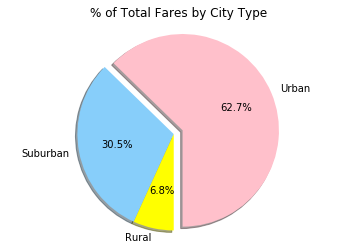

In [5]:
# Show Figure
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=types, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.show()

ANALYSIS: Learning the milage per trip would specificy the breakdown each driver makes based on the type of city they work in. Suburban fares are likely longer trips with a mix of drivers in the urban area as well. 

## Total Rides by City Type

In [10]:
# Calculate Ride Percents



# group data by type

ride_complete = combined_data.count()[["ride_id"]]
#fare_complete

# this will create a groupby object
ride_answers = combined_data.groupby('type')
ride_answers

#total fair value by city type group
total_ride = ride_answers.count()[["ride_id"]]
total_fare




###3BILD PIE CHART


labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [1625, 625, 125]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others#
explode = (0.1, 0, 0)

# Save Figure


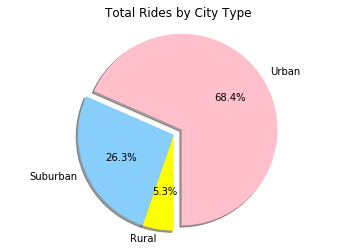

In [12]:
# Show Figure
plt.title("Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.show()

## Total Drivers by City Type

In [13]:
# Calculate Driver Percents

# group data by type
combined_data

# Drop duplicate screen name "SN"
combined_data = combined_data.drop_duplicates(subset=["driver_count"])
#duplicate_dropped


#drivers_complete = combined_data.sum()[["driver_count"]]
#fare_complete


# this will create a groupby object
dtypegp_df = city_data.groupby("type")
df1 = dtypegp_df.get_group("Urban")
urban = df1["driver_count"].sum()

df2 = dtypegp_df.get_group("Rural")
rural = df2["driver_count"].sum()

df3 = dtypegp_df.get_group("Suburban")
suburban = df3["driver_count"].sum()


#total fair value by city type group
#total_fare = dtypegp_df.sum()[["driver_count"]]
#total_fare
# create a df for gender
#type_df = duplicate_dropped.type
#type_df

# gender count
#Answer = type_df.value_counts()
#Answer


## BUILD PIE CHART  

city = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban, suburban, rural]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Save Figure


AttributeError: 'str' object has no attribute 'groupby'

NameError: name 'city' is not defined

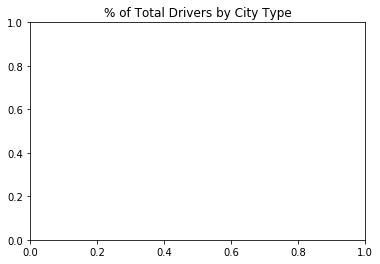

In [14]:
# Show Figure
# Show Figure
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=city, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.show()

ANALYSIS: The lower driver count means that per driver is likely making double that to the dirvers within the Urban areas. Longer rides, higher fares, and less competition with dirver saturation.